<center>
    <h1>
Hasting-Metropolis (and Gibbs) samplers
    </h1>
</center>

In [20]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import copy

# Exercise 1 Hasting-Metropolis within Gibbs – Stochastic Approximation EM

We observe a group of $N$ (independent) individuals. For the i-th individual, we have $k_i$ measurements
$y_{i,j} \in  \mathbb{R}$. In studies on the progression of diseases, measurements $y_{i,j}$ can be measures of weight,
volume of brain structures, protein concentration, tumoral score, etc. over time. We assume that each
measurement $y_{i,j}$ are independent and obtained at time $t_{i,j}$ with $t_{i,1}< . . . < t_{i,k_i}$ .

# 1.A – A population model for longitudinal data

We wish to model an average progression as well as individual-specific progressions of the measurements from the observations $(y_{i,j}) i \in \{1,...,N\} , j \in \{1,...,K\}$. To do that, we consider a hierarchical model defined as follows.



i. We assume that the average trajectory is the straight line which goes through the point $p_0$ at time
$t_0$ with velocity $v_0$
$$d(t) := p_0 + v_0(t − t_0)$$
$$ t_0 \sim N(\bar{t_0},\sigma_{t_0}^2) \ \ v_0 \sim N(\bar{v_0},\sigma_{v_0}^2)$$
and $\sigma_{t_0}$ , $\sigma_{v_0}$ are fixed variance parameters.

ii. For the i-th individual, we assume a trajectory of progression of the form
$$d_i(t) := d( \alpha_i(t − t_0 − t_i) + t_0 )$$.
The trajectory of the i-th individual corresponds to an affine reparametrization of the average trajectory. This affine reparametrization, given by $t -> \alpha_i(t−t_0 −t_i)+t_0$, allows to characterize changes in speed and delay in the progression of the i-th individual with respect to the average trajectory. Moreover, we assume that for all i-th individual measurements

\begin{aligned}
& y_{i,j}=d_i(t_{i,j})+\epsilon_{i,j} \ \ \text{where} \  \ \epsilon_{i,j} \sim N(0,\sigma^2) \\
& \alpha_i \sim N(0,\sigma_{\epsilon}^2) \\
& \tau_i \sim N(0,\sigma_{\tau}^2)
\end{aligned}

The parameters of the model are $\theta = ( \bar{t}_0, \bar{v}_0, \sigma_{\epsilon}, \sigma_{\tau} , \sigma )$. For all $i \in \{1,...,N\}$, $z_i = (\alpha_i, \tau_i)$ are random variables called random effects and $z_{pop} = ( t_0, v_0 )$ are called fixed effects. The fixed effects are used to model the group progression whereas random effects model individual progressions.
Likewise, we define $\theta_i = (\sigma_{\epsilon}, \sigma_{\tau} , \sigma )$ and $\theta_{pop} = ( \bar{t}_0, \bar{v}_0 )$.

We consider a bayesian framework and assume the following a priori on the parameters $\theta$ :

$$\bar{t_0} \sim N(\hat{\hat{t_0}},s_{t_0}^2) \ \ \bar{v_0} \sim N(\hat{\hat{v_0}},s_{v_0}^2)$$

$$\sigma_{\epsilon}\sim W^{-1}(v_{\epsilon},m_{\epsilon}) \ \ \sigma_{\tau}\sim W^{-1}(v_{\tau},m_{\tau}) \ \ \sigma \sim W^{-1}(v,m) $$
    

where $W^{-1}(v,m)$ is the invere-Wishart distribution:
$$ f_{W^{-1}}(\sigma)=\frac{1}{\Gamma(\frac{m_{\sigma}}{2})}(\frac{v}{\sigma \sqrt{2}} exp(-\frac{v^2}{2 \sigma^2})^{m_{\sigma}}$$

## Question 1

Write the complete log-likelihood of the previous model $log q(y, z, \theta)$ and show that the proposed
model belongs to the curved exponential family.

\begin{aligned}
q(y,z,\theta) & = q(y|z_{\{1,..,N\}},z_{pop},\theta) q(z_i,z_{pop}|\theta) q(\theta) \\
& = q(y|z_i,z_{pop},\theta) q(z_{\{1,..,N\}}|\theta) q(z_{pop}|\theta) q(\theta) \\
& = (\prod_{i=1}^N \prod_{j=1}^K q(y_{i,j}|z_{\{1,..,N\}},z_{pop},\theta))(\prod_{i=1}^N q(z_i|\theta)) q(z_{pop}|\theta) q(\theta)
\end{aligned}

Then: 

$$log(q(y,z,\theta))=(\sum_{i=1}^N \sum_{j=1}^K log(q(y_{i,j}|z_{\{1,..,N\}},z_{pop},\theta)))+(\sum_{i=1}^N log(q(z_i|\theta))) + log(q(z_{pop}|\theta))+log( q(\theta))$$

\begin{aligned}
\sum_{i=1}^N \sum_{j=1}^K log(q(y_{i,j}|z_{\{1,..,N\}},z_{pop},\theta)) & \propto -KN log(\sigma) - \frac{1}{2 \sigma^2} \sum_{i=1}^N \sum_{j=1}^K (y_{i,j}-d_i(t_{i,j}))^2 \\
\end{aligned} 

\begin{aligned}
\sum_{i=1}^N log(q(z_i|\theta)) \propto -\frac{N}{2} log(\sigma_{\tau}\sigma_{\epsilon})-\frac{1}{\sigma_{\tau}^2} \sum_{i=1}^N \tau_i^2 -\frac{1}{\sigma_{\epsilon}^2} \sum_{i=1}^N \alpha_i^2 \\
\end{aligned} 

\begin{aligned}
log(q(z_{pop}|\theta)) \propto -\frac{(t_0-\hat{t_0})^2}{2\sigma_{t_0}^2} -\frac{(v_0-\hat{v_0})^2}{2\sigma_{v_0}^2} \\
\end{aligned}

\begin{aligned}
log( q(\theta)) \propto -\frac{(\hat{t_0}-\hat{\hat{t_0}})^2}{2s_{t_0}^2} -\frac{(\hat{v_0}-\hat{\hat{v_0}})^2}{2s_{v_0}^2} + \frac{m_{\epsilon}}{2}(2log(\frac{v_{\epsilon}}{\sigma_{\epsilon}}) - \frac{v_{\epsilon}^2}{\sigma_{\epsilon}^2}) + \frac{m_{\tau}}{2}(2log(\frac{v_{\tau}}{\sigma_{\tau}}) - \frac{v_{\tau}^2}{ \sigma_{\tau}^2})+\frac{m}{2}(2log(\frac{v}{\sigma}) - \frac{v^2}{ \sigma^2}) \\
\end{aligned}

Then:

\begin{aligned}
log(q(y,z,\theta)) \propto -KN log(\sigma) - \frac{1}{2 \sigma^2} \sum_{i=1}^N \sum_{j=1}^K (y_{i,j}-d_i(t_{i,j}))^2 -N log(\sigma_{\tau}\sigma_{\epsilon})-\frac{1}{\sigma_{\tau}^2} \sum_{i=1}^N \tau_i^2 -\frac{1}{\sigma_{\epsilon}^2} \sum_{i=1}^N \alpha_i^2 -\frac{(t_0-\hat{t_0})^2}{2\sigma_{t_0}^2} -\frac{(v_0-\hat{v_0})^2}{2\sigma_{v_0}^2} -\frac{(\hat{t_0}-\hat{\hat{t_0}})^2}{2s_{t_0}^2} -\frac{(\hat{v_0}-\hat{\hat{v_0}})^2}{2s_{v_0}^2} + \frac{m_{\epsilon}}{2}(2log(\frac{v_{\epsilon}}{\sigma_{\epsilon}}) - \frac{v_{\epsilon}^2}{ \sigma_{\epsilon}^2}) + \frac{m_{\tau}}{2}(2log(\frac{v_{\tau}}{\sigma_{\tau}}) - \frac{v_{\tau}^2}{ \sigma_{\tau}^2})+\frac{m}{2}(2log(\frac{v}{\sigma}) - \frac{v^2}{ \sigma^2})
\end{aligned}

The sufficient statistic of the exponential family are:

$$S_1(y,z)=\frac{\sum_{i=1}^N \sum_{j=1}^K (y_{i,j}-d_i(t_{i,j}))^2}{KN}$$
$$S_2(y,z)= \frac{\sum_{i=1}^N \tau_i^2}{N} \ \ S_3(y,z)= \frac{\sum_{i=1}^N \alpha_i^2}{N}$$
$$ S_4(y,z)=t_0 \ \ S_5(y,z)=v_0$$ 

In this way:

$<S(y,z),\psi(\theta)>=S_1(y,z) (\frac{-KN}{2\sigma^2})+S_2(y,z) (\frac{-N}{2\sigma^2_{\epsilon}})+S_3(y,z) (\frac{-N}{2\sigma^2_{\tau}})+S_4(y,z) (\frac{\hat{t_0}}{\sigma^2_{t_0}})+S_5(y,z) (\frac{\hat{v_0}}{\sigma^2_{v_0}})$$

All the other terms are part of the function $\phi(\theta)$. 
Then the model belongs to the curved exponencial family.

## Question 2

Generate synthetic data from the model by taking some reasonable values for the parameters.

In [9]:
## Fixed parameters
p0=10
sigma_t0=1
sigma_v0=2
fixed_parameters={"p0":p0,"sigma_t0":sigma_t0,"sigma_v0":sigma_v0}
## Parameters to estimate
t0_hat=0
v0_hat=3
sigma=1
sigma_tau=0.5
sigma_eps=0.1
### Distance
def distance(t,p0,v0,t0):
    return p0+v0*(t-t0)

In [10]:
### Syntetic data
size=1000
dimension=10
t0=np.random.normal(t0_hat,sigma_t0,size=1)
v0=np.random.normal(t0_hat,sigma_t0,size=1)
y=np.zeros((1000,10))
for i in range(dimension):
    eps=np.random.normal(scale=sigma_eps,size=size)
    alpha=np.exp(eps)
    tau=np.random.normal(scale=sigma_tau,size=size)
    y[:,i]=distance(alpha*(i-t0-tau)+t0,p0,v0,t0)

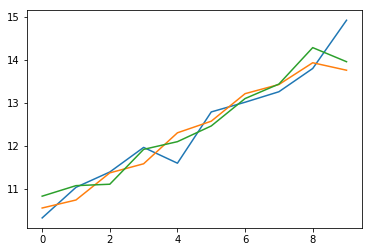

In [11]:
plt.plot(np.arange(dimension),y[0])
plt.plot(np.arange(dimension),y[1])
plt.plot(np.arange(dimension),y[2])

## Question 3

Propose a Metropolis-Hastings sampler to sample from the a posteriori distribution of the latent
variable $z = (z_{pop}, z_i)_{i \in [1,N]} = (t_0, v_0, \epsilon_i, \tau_i)_{i \in [1,N]} \in \mathbb{R}^{2N+2}$.

A natural choice for the proposal distribution is to consider a multivariate Gaussian distribution
$N (z, \sigma_{prop})$.Thus, the acceptance ratio simply writes $min(1,\frac{\pi(z^*)}{\pi(z^{(k)})})$ . This algorithm is called Symmetric Random Walk Hasting-Metropolis algorithm.

In [12]:
def MH(t0_hat,v0_hat,sigma_t0,sigma_v0,sigma_eps,sigma_tau,sigma_prop):
    d=2*N+2
    mu_para=[t0_hat,v0_hat]+(2*N)*[0]
    Sigma_prop=sigma_prop*np.eyes(d)
    Sigma_para=[sigma_t0,sigma_v0,sigma_eps,sigma_tau]

## Question 4

We want to use the Expectation-Maximization algorithm to maximize the likelihood, especially as we
have proved at the question 1 that the model belongs to the curved exponential family. Nevertheless,
the expectation required by the EM algorithm $Q_k(\theta^{(k)}) = E_y[q(y, z, \theta^{(k)})|y, \theta^{(k)}]$ cannot be calculated here, due to the latent variable z. So, we have to use a stochastic version of the EM algorithm, namely the SAEM algorithm: the Expectation step is split into two steps, the Simulation one and the Stochastic Approximation one.

Compute the optimal parameters
$$\theta^{(k)} = argmax_{\theta \in \Theta} \{−\phi(\theta) + <S_k | \psi(\theta)>\}$$

and implement the HM-SAEM in order to find the MAP. In particular, we assume that the MAP
exists. Use the question 2 to check your algorithm.
For step-sizes $\epsilon_k$ we can choose a parameter $N_b$ – burn-in parameter – and define
$$\forall k \in N, \ \
\begin{cases}
1 \ \ \text{if} \ \ k \in [1,N_b]  \\
(k − N_b)^{−\alpha} otherwise
\end{cases}$$

## Question 5

Propose a Metropolis-Hastings within Gibbs sampler to sample from the a posteriori distribution
of $z_i = (\epsilon_i, \tau_i)$.

In [47]:
def sim_individual(data,t0,v0,tau,eps,fixed_parameters,theta,sigma_sim_ind):
    N=data.shape[0]
    K=data.shape[1]
    tau_sim=np.zeros(N)
    eps_sim=np.zeros(N)
    #### Fixing simulations parameters
    sim_sigma_tau=sigma_sim_ind["sigma_tau"]
    sim_sigma_eps=sigma_sim_ind["sigma_eps"]
    ##### Other parameters
    p0=fixed_parameters["p0"]
    sigma_tau=theta["sigma_tau"]
    sigma_eps=theta["sigma_eps"]
    
    ####### Simulations
    for i in range(N):
        ########## Tau Simulation
        tau_candidate=np.random.normal(tau[i],sim_sigma_tau)
        di=np.sum((data[i,:]-distance(np.exp(eps[i])*(np.arange(K)-t0-tau[i])+t0,fixed_parameters["p0"],v0,t0))**2)
        di_candidate=np.sum((data[i,:]-distance(np.exp(eps[i])*(np.arange(K)-t0-tau_candidate)+t0,fixed_parameters["p0"],v0,t0))**2)
        p_tau=-0.5*(tau[i]/sigma_tau)**2
        p_tau_candidate=-0.5*(tau_candidate/sigma_tau)**2 
        alpha_tau=di_candidate-p_tau-di+p_tau_candidate
        u=np.random.uniform(size=1)
        tau_sim[i]=np.where(np.log(u)<=np.min([0.,alpha_tau]),tau_candidate,tau[i])
        ######### Epsilon simulation
        eps_candidate=np.random.normal(eps[i],sim_sigma_eps)
        di=np.sum((data[i,:]-distance(np.exp(eps[i])*(np.arange(K)-t0-tau_sim[i])+t0,p0,v0,t0))**2)
        di_candidate=np.sum((data[i,:]-distance(np.exp(eps_candidate)*(np.arange(K)-t0-tau_sim[i])+t0,p0,v0,t0))**2)
        p_eps=-0.5*(eps[i]/sigma_eps)**2
        p_eps_candidate=-0.5*(eps_candidate/sigma_eps)**2 
        alpha_eps=di_candidate-p_eps-di+p_eps_candidate
        u=np.random.uniform(size=1)
        eps_sim[i]=np.where(np.log(u)<=np.min([0.,alpha_eps]),eps_candidate,eps[i])
    return tau_sim,eps_sim

## Question 6

Likewise, propose a HMwG sampler for the a posteriori distribution of $z_{pop} = (t_0, v_0)$.

In [48]:
def sim_population(data,t0,v0,tau,eps,fixed_parameters,theta,sigma_sim_pop):
    N=data.shape[0]
    K=data.shape[1]
    y_hat=np.zeros((N,K))
    y_hat_t0=np.zeros((N,K))
    y_hat_v0=np.zeros((N,K))
    
    #### Fixing simulations parameters
    sim_sigma_t0=sigma_sim_pop["sigma_t0"]
    sim_sigma_v0=sigma_sim_pop["sigma_v0"]
    ##### Other parameters
    p0=fixed_parameters["p0"]
    sigma_t0=fixed_parameters["sigma_t0"]
    sigma_v0=fixed_parameters["sigma_v0"]
    t0_hat=theta["t0_hat"]
    v0_hat=theta["v0_hat"]
    
    ###### Simulation
    t0_candidate=np.random.normal(t0,sim_sigma_t0)
    v0_candidate=np.random.normal(v0,sim_sigma_v0)
    
    ###### t0 simulation
    for i in range(dimension):
        y_hat[:,i]=distance(np.exp(eps)*(i-t0-tau)+t0,p0,v0,t0)
        y_hat_t0[:,i]=distance(np.exp(eps)*(i-t0_candidate-tau)+t0_candidate,p0,v0,t0_candidate)
    y_given_all=(-1./(2*sigma**2))*np.sum((data-y_hat)**2)
    y_given_all_t0=(-1./(2*sigma**2))*np.sum((data-y_hat_t0)**2)               
    q_t0=(-1./(2.*(sigma_t0)**2))*(t0-t0_hat)**2
    q_t0_candidate=(-1./(2.*sigma_t0**2))*(t0_candidate-t0_hat)**2
    alpha_t0=y_given_all_t0+q_t0_candidate-y_given_all-q_t0
    u=np.random.uniform(size=1)
    t0_sim=np.where(np.log(u)<=np.min([alpha_t0,0.]),t0_candidate,t0)
    
    ###### v0 simulation
    for i in range(dimension):
        y_hat[:,i]=distance(np.exp(eps)*(i-t0_sim-tau)+t0_sim,p0,v0,t0_sim)
        y_hat_v0[:,i]=distance(np.exp(eps)*(i-t0_sim-tau)+t0_sim,p0,v0_candidate,t0_sim)
    
    y_given_all=(-1./(2*sigma**2))*np.sum((data-y_hat)**2)             
    y_given_all_v0=(-1./(2*sigma**2))*np.sum((data-y_hat_v0)**2)               
    q_v0=(-1./(2.*sigma_v0**2))*(v0-v0_hat)**2
    q_v0_candidate=(-1./(2.*sigma_v0**2))*(v0_candidate-v0_hat)**2
    alpha_v0=y_given_all_v0+q_v0_candidate-y_given_all-q_v0   
    
    u=np.random.uniform(size=1)
    v0_sim=np.where(np.log(u)<=np.min([alpha_v0,0.]),v0_candidate,v0)
    
    return t0_sim,v0_sim

## Question 7

Implement the HMwG-SAEM in order to find the MAP.

In [49]:
#theta_apriori=s_t0,t0_barbar,s_v0,v0_barbar,v_eps,m_eps,v_tau,m_tau,v,m
def HMwG_SAEM(fixed_parameters,theta_ini,theta_apriori,sigma_sim_ind,sigma_sim_pop,N_b,max_iter=10000):
    N=data.shape[0]
    K=data.shape[1]
    #### Initialization
    tau=np.zeros(N)
    eps=np.zeros(N)
    t0=0.
    v0=2.
    theta=theta_ini
    di=np.zeros((N,K))
    S1_old=0.
    S2_old=0.
    S3_old=0.
    S4_old=0.
    S5_old=0.
    ##### Burn-in period
    for i in range(int(max_iter/2)):
        tau,eps=sim_individual(data,t0,v0,tau,eps,fixed_parameters,theta,sigma_sim_ind)
        t0,v0=sim_population(data,t0,v0,tau,eps,fixed_parameters,theta,sigma_sim_pop)
        
       
    for i in range(int(max_iter/2)):
        ##### Simulation of latent variables
        tau,eps=sim_individual(data,t0,v0,tau,eps,fixed_parameters,theta,sigma_sim_ind)
        t0,v0=sim_population(data,t0,v0,tau,eps,fixed_parameters,theta,sigma_sim_pop)
        for k in range(K):
            di[:,k]=distance(np.exp(eps)*(k-t0-tau)+t0,fixed_parameters["p0"],v0,t0)
        #### Stochastisch approximation
        
        if i<N_b:
            eps_k=1
        else:
            print(i+1-N_b)
            eps_k=(i+1-N_b)**(-0.65)
        
        S1_new=S1_old+eps_k*(np.sum((data-di)**2)/(1.*K*N)-S1_old)
        S2_new=S2_old+eps_k*(np.mean(eps**2)-S2_old)
        S3_new=S3_old+eps_k*(np.mean(tau**2)-S3_old)
        S4_new=S4_old+eps_k*(t0-S4_old)
        S5_new=S5_old+eps_k*(v0-S5_old)
        ##### Optimization of each parameter
        t0_hat=(S4_new/(fixed_parameters["sigma_t0"]**2)+theta_apriori["t0_hathat"]/(theta_apriori["s_t0"]**2))*(((1./fixed_parameters["sigma_t0"])**2+(1./theta_apriori["s_t0"])**2)**(-1))
        v0_hat=(S5_new/(fixed_parameters["sigma_v0"]**2)+theta_apriori["t0_hathat"]/(theta_apriori["s_v0"]**2))*(((1./fixed_parameters["sigma_v0"])**2+(1./theta_apriori["s_v0"])**2)**(-1))
        sigma_eps=np.sqrt((N*S2_new+theta_apriori["m_eps"]*theta_apriori["v_eps"]**2)/(1.*(N+theta_apriori["m_eps"])))
        sigma_tau=np.sqrt((N*S3_new+theta_apriori["m_tau"]*theta_apriori["v_tau"]**2)/(1.*(N+theta_apriori["m_tau"])))
        sigma=np.sqrt((K*N*S1_new+theta_apriori["m"]*theta_apriori["v"]**2)/(1.*(K*N+theta_apriori["m"])))
        theta={"t0_hat":t0_hat,"v0_hat":v0_hat,"sigma_eps":sigma_eps,"sigma":sigma,"sigma_tau":sigma_tau}
        print(theta)
        S1_old=copy.deepcopy(S1_new)
        S2_old=copy.deepcopy(S2_new)
        S3_old=copy.deepcopy(S3_new)
        S4_old=copy.deepcopy(S4_new)
        S5_old=copy.deepcopy(S5_new)
    return(theta)
        

In [50]:
## Fixed parameters
p0=10.
sigma_t0=1.
sigma_v0=2.
fixed_parameters={"p0":p0,"sigma_t0":sigma_t0,"sigma_v0":sigma_v0}

In [51]:
##### A priori parameters 
t0_hathat=0.
v0_hathat=3.
s_t0=0.01
s_v0=0.01
v=1.
m=0.01
m_eps=0.01
v_eps=1.
m_tau=0.01
v_tau=1.
theta_apriori={"t0_hathat":t0_hathat,"v0_hathat":v0_hathat,"s_t0":s_t0,"s_v0":s_v0,"m":m,"v":v,"m_eps":m_eps,"v_eps":v_eps,"m_tau":m_tau,"v_tau":v_tau}

In [52]:
## Initial guest of parameters
t0_hat=1.
v0_hat=4.
sigma=2.
sigma_tau=1.5
sigma_eps=0.4
theta_ini={"t0_hat":t0_hat,"v0_hat":v0_hat,"sigma_eps":sigma_eps,"sigma":sigma,"sigma_tau":sigma_tau}

In [53]:
N_b=20
data=y
sigma_sim_pop={"sigma_t0":1.,"sigma_v0":1.}
sigma_sim_ind={"sigma_tau":2.,"sigma_eps":1.}
theta_estim=HMwG_SAEM(fixed_parameters,theta_ini,theta_apriori,sigma_sim_ind,sigma_sim_pop,N_b,max_iter=100)

{'t0_hat': array([0.00169209]), 'v0_hat': array([-4.01692494e-07]), 'sigma_eps': 20.738718410474007, 'sigma': 207628776785335.03, 'sigma_tau': 41.50794334852408}
{'t0_hat': array([0.00166855]), 'v0_hat': array([-4.01692494e-07]), 'sigma_eps': 21.134377368303483, 'sigma': 461333171614646.75, 'sigma_tau': 42.28943944149183}
{'t0_hat': array([0.00166855]), 'v0_hat': array([-4.01692494e-07]), 'sigma_eps': 21.522118946143145, 'sigma': 461355228017856.4, 'sigma_tau': 43.07646182862805}
{'t0_hat': array([0.00158495]), 'v0_hat': array([-4.01692494e-07]), 'sigma_eps': 21.912651592525165, 'sigma': 472748239098782.94, 'sigma_tau': 43.93739147067655}
{'t0_hat': array([0.00158495]), 'v0_hat': array([-4.01692494e-07]), 'sigma_eps': 22.317326795294598, 'sigma': 1637817657803498.0, 'sigma_tau': 44.65131301987991}
{'t0_hat': array([0.00145929]), 'v0_hat': array([-4.01692494e-07]), 'sigma_eps': 22.702590277308968, 'sigma': 5647452991466981.0, 'sigma_tau': 45.43687689668161}
{'t0_hat': array([0.00130204]

## Question 8
We can improve the sampling step for big dataset by considering a Block HMwG sampler instead of a
"one-at-a-time" as described above HMwG sampler. In the Block version, each Metropolis-Hastings step
of the algorithm consists in a multivariate symmetric random walk. Then, the Block MHwG sampler
updates simultaneously block (or sets) of latent variables given the others.

Explain what is the advantages of a Block Gibbs sampler over a "one-at-a-time" Gibbs sampler
for our model.

## Question 9

Implement a Block HMwG sampler by choosing a block for the fixed effects and a block by
individuals.

# Excercise 2 Multiplicative Hasting-Metropolis

Let $f$ be a density function on $]−1, 1[$. We consider the multiplicative Hasting-Metropolis algorithm
defined as follows.

Let X be the current state of the Markov chain.

i) We sample $\epsilon$ from the probability density function f and a random variable $B$ from
the Bernoulli distribution with parameter $\frac{1}{2}$.

ii) If $B = 1$, we set $Y =\epsilon X$. Otherwise, we set $Y =\frac{X}{\epsilon}$. Then, we accept the candidate $Y$ with a probability given by $\alpha(X,Y)$, the usual Hasting-Metropolis acceptation ratio.

In [3]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt


## Question 1

Determine the density of the jumping distribution $Y \sim q(X, Y )$.

We denote $h(.)$ a measurable and bounded function.

Let´s suppose first that $x>0$, then:

\begin{aligned}
E[h(Y)]&=E[h(\epsilon X)|B=1]P(B=1)+E[h(\epsilon X)|B=0]P(B=0)=\frac{1}{2} \int_{-1}^{1} h(\epsilon X) f_{\epsilon}(\epsilon) d\epsilon + \frac{1}{2} \int_{-1}^{1} h(\frac{X}{\epsilon}) f_{\epsilon}(\epsilon) d\epsilon \\
&= \frac{1}{2} \int_{-x}^{x} h(Y) \frac{f_{\epsilon}(\frac{Y}{X})}{X} dY + \frac{1}{2} \int_{-\infty}^{-x} h(Y) f_{\epsilon}(\frac{X}{Y}) \frac{X}{Y^2} dY + \frac{1}{2} \int_{x}^{\infty} h(Y) f_{\epsilon}(\frac{X}{Y}) \frac{X}{Y^2} dY
\end{aligned}

In a similar way, we can find that:

$E[h(Y)]= \frac{1}{2} \int_{x}^{-x} h(Y) \frac{f_{\epsilon}(\frac{Y}{X})}{-X} dY + \frac{1}{2} \int_{-\infty}^{x} h(Y) f_{\epsilon}(\frac{X}{Y}) \frac{-X}{Y^2} dY + \frac{1}{2} \int_{-x}^{\infty} h(Y) f_{\epsilon}(\frac{X}{Y}) \frac{-X}{Y^2}$

In conclusion we have that for $X \neq 0$:

$$f_y(y)=\frac{1}{2} \frac{f_{\epsilon}(\frac{Y}{X})}{|X|} \mathbb{1}_{]-|X|,|X|[}+\frac{1}{2} h(Y) f_{\epsilon}(\frac{X}{Y}) \frac{|X|}{Y^2} \mathbb{1}_{[-\infty,-|X|[} + \frac{1}{2}  h(Y) f_{\epsilon}(\frac{X}{Y}) \frac{|X|}{Y^2} \mathbb{1}_{[|X|,\infty[}$$

For $X=0$ we have that:

$$E[h(0)]=h(0)$$

Then we have that the measure related with the transition is the dirichlet measure, which does not have a density distribution, a characteristic that is required for the HM algorithm. Nevertheless, if we start with $X!=0$ and we choose $\epsilon$ to be a density which assigns 0 probability to $0$, we will not have problems to implement de algorithm. 

## Question 2

Compute the acceptation ratio $\alpha$ so that the chain has a given distribution $\pi$ as invariant distribution.

According to the results seen in the course, we have that the HMM algorithm converge if we fix:

$$\alpha=min(1,\frac{q(y_{n+1},x_n) \pi(y_{n+1})}{q(x_n,y_{n+1}) \pi(x_n)})$$

## Question 3 

I use a uniform density in the interval $]-1,1[$ for generate $\epsilon$ in order to implement the multiplicative Hasting-Metropolis algorithm. 

I analyze the algorithm's performance by simulating observations from a exponential distribution and from a normal distribution. The fist one, can be simulated efficiently by the inverse transform method.


In [18]:
def Q_xy(x,y):
    ## Jumping distribution
    ## Input
    # x real value.
    # y real value.
    if (y<abs(x) and -y<abs(x)):
        q_xy=(1./2.)*1/abs(x)*(1./2.)
    else:
        q_xy=(1./2.)*(abs(x)/(y**2))*(1./2.)
    return(q_xy)



def Mul_HM(x0,N,distribution,loc,scale):
    ### Implementation of the Multiplicative Hasting-Metropolis
    ### for the exponential and the normal distributions
    
    ## Input. 
    # x0 initial point
    # N number of simulations
    # distribution "exponential", "normal"
    # loc and scale parameters of the distribution to be simulated
    nsim=0
    simulations=np.zeros(N)
    X=x0
    
    while nsim<N:
        e=np.random.uniform(-1,1,size=1)
        B=np.where(np.random.uniform(size=1)<=1/2,1,0)
        Y=np.where(B==1,e*X,X/e)
        
        if distribution=="exponential":
            p_x=scipy.stats.expon.pdf(X,loc,scale)
            p_y=scipy.stats.expon.pdf(Y,loc,scale)
            q_xy=Q_xy(X,Y)
            q_yx=Q_xy(Y,X)
        
        if distribution=="normal":
            p_x=scipy.stats.norm.pdf(X,loc,scale)
            p_y=scipy.stats.norm.pdf(Y,loc,scale)
            q_xy=Q_xy(X,Y)
            q_yx=Q_xy(Y,X)
        
        a_xy=min([(p_y/p_x)*(q_yx/q_xy),1])
        u=np.random.uniform(size=1)
        
        if u<=a_xy:
            simulations[nsim]=Y
            nsim+=1
            X=Y
    return(simulations)



## Question 4

For both problems, the multiplicative MH approximate the distribution well. In both cases, I delete the first observations since the algorithm is garanted to converge in the limit to infinity. For the Gaussian distributio,I need a longer burn period to get good results. 


### Exponential distribution 

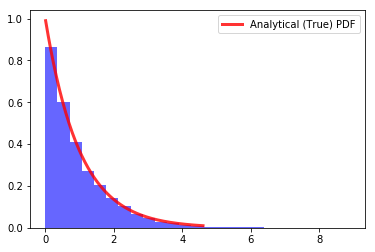

In [21]:
x0=1
N=10000
loc=0
scale=1
distribution="exponential"
sim_exponencial=Mul_HM(x0,N,distribution,loc,scale)  

sim_exponencial=sim_exponencial[1000:N]


x = np.linspace(start=scipy.stats.expon.ppf(0.01,loc,scale),
                stop=scipy.stats.expon.ppf(0.99,loc,scale), num=250)
plt.hist(sim_exponencial,bins=25,density=True,alpha=0.6,color='b')
plt.plot(x,scipy.stats.expon.pdf(x,loc,scale), linestyle='solid', c='red', lw=3,alpha=0.8, label='Analytical (True) PDF')
plt.legend()

### Normal distribution

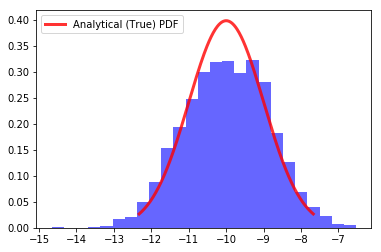

In [25]:
x0=-5
N=10000
loc=-10
scale=1
distribution="normal"

sim_normal=Mul_HM(x0,N,distribution,loc,scale)  

sim_normal=sim_normal[5000:N]


x = np.linspace(start=scipy.stats.norm.ppf(0.01,loc,scale),
                stop=scipy.stats.norm.ppf(0.99,loc,scale), num=250)
plt.hist(sim_normal,bins=25,density=True,alpha=0.6,color='b')
plt.plot(x,scipy.stats.norm.pdf(x,loc,scale), linestyle='solid', c='red', lw=3,alpha=0.8, label='Analytical (True) PDF')
plt.legend()

# Exercise 3 Data Augmentation



Les $f : (x, y) \in R^p × R^q \rightarrow f(x, y) \in R^+$ be a density with respect to the Lebesgue measure on $R^{p+q}$.

Lets define: 
    
$$f_X(x) =\int f(x, y) dy \ \ \ f_Y (y) = \int f(x, y) dx $$

and 

$$ \forall y \in Y := \{ y \in R^q | f_Y (y) > 0\} , f_{X|Y} (x, y) := \frac{f(x, y)}{f_Y (y)}$$
$$ \forall x \in X := \{ x \in R^q | f_X (x) > 0\} , f_{Y|X} (x, y) := \frac{f(x, y)}{f_X (x)}$$

We define a bivariate chain $\{(X_n, Y_n), n > 0\}$ as in the following algorithm

### Algorithm 4
Given $(X_0, Y_0) \in R^p × R^q$ and $N \in \mathbb{N}$

for $n = 1 \ \ to \ \ N$ do

$X_n \sim f_{X|Y} (·, Y_{n−1})$

$Y_n \sim f_{Y|X}(X_n, ·)$

end

return $\{(X_n, Y_n), 0 \leq n \leq N\}$


## Question 1

Show that the bivariate process $\{(Xn, Yn), n > 0\}$ is a Markov chain. Give the expression of its transition kernel as a function of the quantities defined above.

In a first stage, we should show that $P((x_n,y_n)\in A|F_{n-1})=\int_A f_{x|y} (x,Y_{n-1}) f_{y|x} (x,y) dxdy$

As the function only depends on the previous values of the chain, it is a Markov chain.

The transition kernel will be: 

$$E[h(x_n,y_n)|X_{n-1},Y_{n-1}]=\int h(x,y) f_{x|y} (x,Y_{n-1}) f_{y|x} (x,y) dxdy$$

Then the kernel of the markov chain is: $f_{x|y} (x,Y_{n-1}) f_{y|x} (x,y)$.

## Question 2

Show that $\{Yn, n > 0\}$ is a Markov chain : give the expression of its transition kernel and prove that $f_Y (y) dy$ is invariant for this kernel.

Hereafter, we consider the case when

$$f(x, y) = \frac{4}{\sqrt{2 \pi}} y^{\frac{3}{2}} exp(-y(\frac{x^2}{2}+2)) \mathbb{1}_{\mathbb{R}^+}(y)$$

Lets first show:

\begin{aligned}
P(Y_n \in A)&=\int_A f_{y|x_n}(x_n,y) dy = \int_{\mathbb{R}^P} \int_A f_{y|x_n}(x_n,y) f_{x_n|Y_{n-1}} (x_n) dy dx_n \\
&=\int_A \int_{\mathbb{R}^P} f_{y|x_n}(x_n,y) f_{x_n|Y_{n-1}} (x_n) dx_n dy 
\end{aligned}

By definition of $Y_n$ it is clear that $Y_n$ and $Y_{n-1}$ are conditional independent given $X_n$ , then $f_{Y_n|X_n}(.,.)=f_{Y_n|X_n, Y_{n-1}}(.,.,Y_{n-1})$ 

\begin{aligned}
\int_A \int_{\mathbb{R}^P} f_{y|x_n}(x_n,y) f_{x_n|Y_{n-1}} (x_n) dx_n dy &= \int_A \int_{\mathbb{R}^P} f_{y|x_n,y_{n+1}}(x_n,y,Y_{n-1}) f_{x_n|Y_{n-1}} (x_n) dx_n dy \\
&= \int_A f_{y|y_{n+1}}(y,Y_{n-1}) dy
\end{aligned}

Then as the function only depends on the last value of the chain, the function is a Marckov chain.

From the proof is clear that the transition kernel is $p(y_n,y_{n+1})=f_{y_n|y_{n+1}}(y_n,y_{n-1})$.

It is easy to show that $f(y)$ is invariant under the chaine. 
$$\int_R f_{y|y_{n+1}}(y,y_{n-1}) f(y) dy == f(y_{n+1})=f(y)$$

## Question 4

Describe a Gibbs algorithm to approximate the distribution on R × R with density f.

The first step to simulate from the given distribution is to derivate the marginals distribution and conditional distributions:

$$f_y(y)= y^{\frac{3}{2}} exp(-2y) \int_x \frac{4}{\sqrt{2 \pi}} exp(-y \frac{x^2}{2})= 4 y exp(-2y)$$

then $y$ follows a gamma distribution.

For $x$ we get:

$$f_x(x)= \int_y \frac{4}{\sqrt{2 \pi}} \frac{(\frac{x^2}{2}+2)^{\frac{5}{2}}}{(\frac{x^2}{2}+2)^{\frac{5}{2}}} y^{\frac{3}{2}} exp(-y(\frac{x^2}{2}+2)= \frac{4 \Gamma (\frac{5}{2})}{\sqrt{2 \pi} (\frac{x^2}{2}+2)^{\frac{5}{2}}} $$

Then the conditional densities are: 

$$f_{y|x}(x,y)=\frac{(\frac{x^2}{2}+2)^{\frac{5}{2}}}{\Gamma(\frac{5}{2})} exp(-y(\frac{x^2}{2}+2)) y^{\frac{3}{2}}$$

which is a gamma distribution.

$$f_{x|y}(x,y)=\frac{y^{\frac{1}{2}}}{\sqrt{2\pi}} exp(-y(\frac{x^2}{2}))$$
which is a gaussian distribution.


As we can see in the marginal's plots, the algorithm effectvely samples from the desired distribution.


In [11]:
def Gibbs(x0,y0,N):
    ## Function implementing Gibbs sampling for the density of question 2.
    ## Input
    # x0,y0 initial points.
    # N number of simulations.
    simulations=np.zeros((N,2))
    X=x0
    Y=y0
    for i in range(N):
        X=np.random.normal(scale=np.sqrt(1/Y))
        Y=np.random.gamma(shape=5./2.,scale=2/(4+X**2))
        simulations[i,:]=[X,Y]
    return(simulations)

def f_x(x):
    ## Function to compute the marginal of X at the point x
    ## Input
    # x point to valuate.
    return((4/np.sqrt(2*np.pi))*scipy.special.gamma(5./2.)*((2/(4+x**2))**(5./2.)))

In [12]:
x0=1
y0=1
N=10000
simulations=Gibbs(x0,y0,N)
simulations=simulations[1000:]

## Marginal of X. 

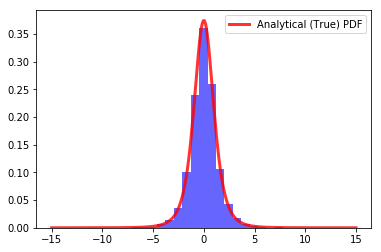

In [13]:
plt.hist(simulations[:,0],bins=25,density=True,alpha=0.6,color='b')  
x = np.linspace(start=-15,
                stop=15, num=250)
plt.plot(x,f_x(x), linestyle='solid', c='red', lw=3,alpha=0.8, label='Analytical (True) PDF')
plt.legend()


## Marginal of Y

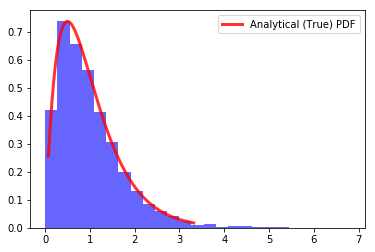

In [14]:
x = np.linspace(start=scipy.stats.gamma.ppf(0.01,a=2,scale=1./2.),
                stop=scipy.stats.gamma.ppf(0.99,a=2,scale=1./2.), num=250)
plt.hist(simulations[:,1],bins=25,density=True,alpha=0.6,color='b')
plt.plot(x,scipy.stats.gamma.pdf(x,a=2,scale=1./2.), linestyle='solid', c='red', lw=3,alpha=0.8, label='Analytical (True) PDF')
plt.legend()